# EXPLORATORY DATA ANALYSIS: QUALITY DATA SCIENTIST AMONG KAGGLERS
WHY THIS TOPIC?

This notebook aims at finding the number of quality data scientists among kagglers and to study their various attributes. The main purpose behind choosing this topic in particular is to help out beginners in Data science, being a student I myself have a hard time making simple choices while learning, researching what to choose from the crazy amount of options available. So, I thought it would be a perfect platform to learn from the members of the community by utilizing the little skills I have managed to gain till date. I will get back to the word ‘Quality’ shortly. With experts predicting that 40 zettabytes of data will be in existence by 2020, Data Science career opportunities will only shoot through the roof! This makes data science such an in-demand skill.

‘QUALITY’ DATA SCIENTIST

In this study I have taken certain factors into account to categorize a person as a ‘Quality Data Scientist’. I would like to highlight the fact that I am not an expert, I am a mere student and the considerations made by me are purely based on what I believe should be considered ideal.

• Select any activities that make up an important part of your role at work (Q23)

I haven’t taken factors like age, education qualification, experience of coding into account as I strongly believe that age is just a number. Different people have different approach towards data science some take specialized degrees while some have no formal education yet come out exceptionally good. Similarly, the effective number of hours a person spends on coding cannot be determined.

• Where do you publicly share or deploy your data analysis or machine learning applications?(Q36)

# Importing Libraries & Loading Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,20037,20037,20037,20037,19570,19278,19121,15531,4278,7536,...,1178,495,431,3200,558,481,847,520,3083,252
unique,5168,12,6,56,8,14,8,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,34,4011,15789,5851,7859,5171,4546,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,3082,251


In [4]:
df.isnull().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                       467
                                       ...  
Q35_B_Part_7                           19556
Q35_B_Part_8                           19190
Q35_B_Part_9                           19517
Q35_B_Part_10                          16954
Q35_B_OTHER                            19785
Length: 355, dtype: int64

In [5]:
df['Q4'].fillna(value=(df['Q4'].mode()[0]),inplace= True)
df['Q23_Part_7'].fillna(value='0',inplace=True)
df['Q36_Part_9'].fillna(value='0',inplace=True)

# The Quality Data Scientists

In [6]:
df1=df[df.Q23_Part_7.str.contains('None of these activities are an important part of my role at work') | df.Q36_Part_9.str.contains('I do not share my work publicly')]
quality_DS=pd.concat([df,df1]).drop_duplicates(keep=False)
quality_DS.shape

(16317, 355)

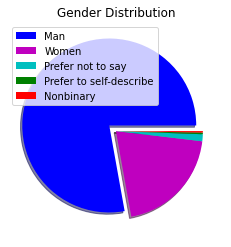

In [7]:
gender=['Man','Women','Prefer not to say','Prefer to self-describe','Nonbinary']
values=quality_DS['Q2'].value_counts()
cols=['b','m','c','g','r']
explode=[0.1,0,0,0,0]
plt.pie(values,labels=None,colors=cols,explode=explode,shadow=True)
plt.title('Gender Distribution')
plt.legend(gender,loc='upper left')
plt.show()

cleary, we can see that majority of the Quality Data Scientists identify themselves male.

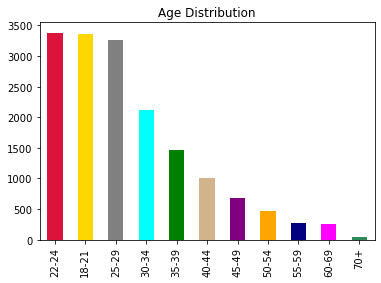

In [8]:
colour=['crimson','gold','grey','cyan','green','tan','purple','orange','navy','magenta','seagreen','lime','indigo']
quality_DS['Q1'].value_counts().plot(kind='bar',color=colour)
plt.title('Age Distribution')
plt.show()

Mostly people between the ages 22-24,18-21,25-29 fall under our created category of quality data scientists. This makes it quite evident that data science is quite popular amoung the younger generation.

# Education and Employment

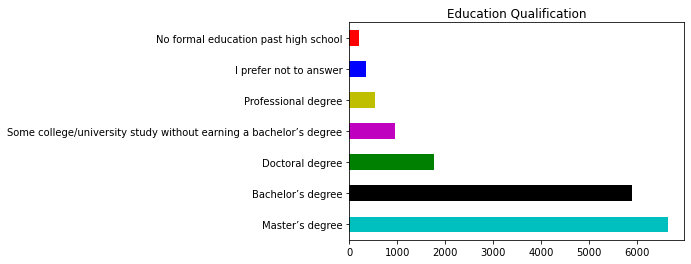

In [9]:
col=["c","k","g","m","y","b","r"]
quality_DS['Q4'].value_counts().plot(kind='barh',color=col,fontsize=10)
plt.title('Education Qualification')
plt.show()

Most of the people falling under the category of quality DS have completed their master's followed by bachelor's degree. However,only a few have managed to get a doctoral degree. Also,there are significant amount of people who have not completed their bacherlor's yet manage to fulfill the criteria for quality DS.

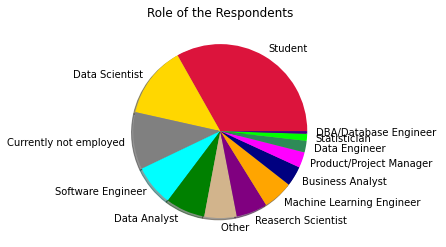

In [10]:
role=['Student','Data Scientist','Currently not employed','Software Engineer','Data Analyst ','Other ','Reaserch Scientist',
     'Machine Learning Engineer ','Business Analyst','Product/Project Manager ','Data Engineer','Statistician',
      'DBA/Database Engineer ']
value=quality_DS['Q5'].value_counts()
plt.pie(value,labels=role,shadow=True,colors=colour)
plt.title('Role of the Respondents')
plt.show()

Majority of the respondents are students followed by data scientists.

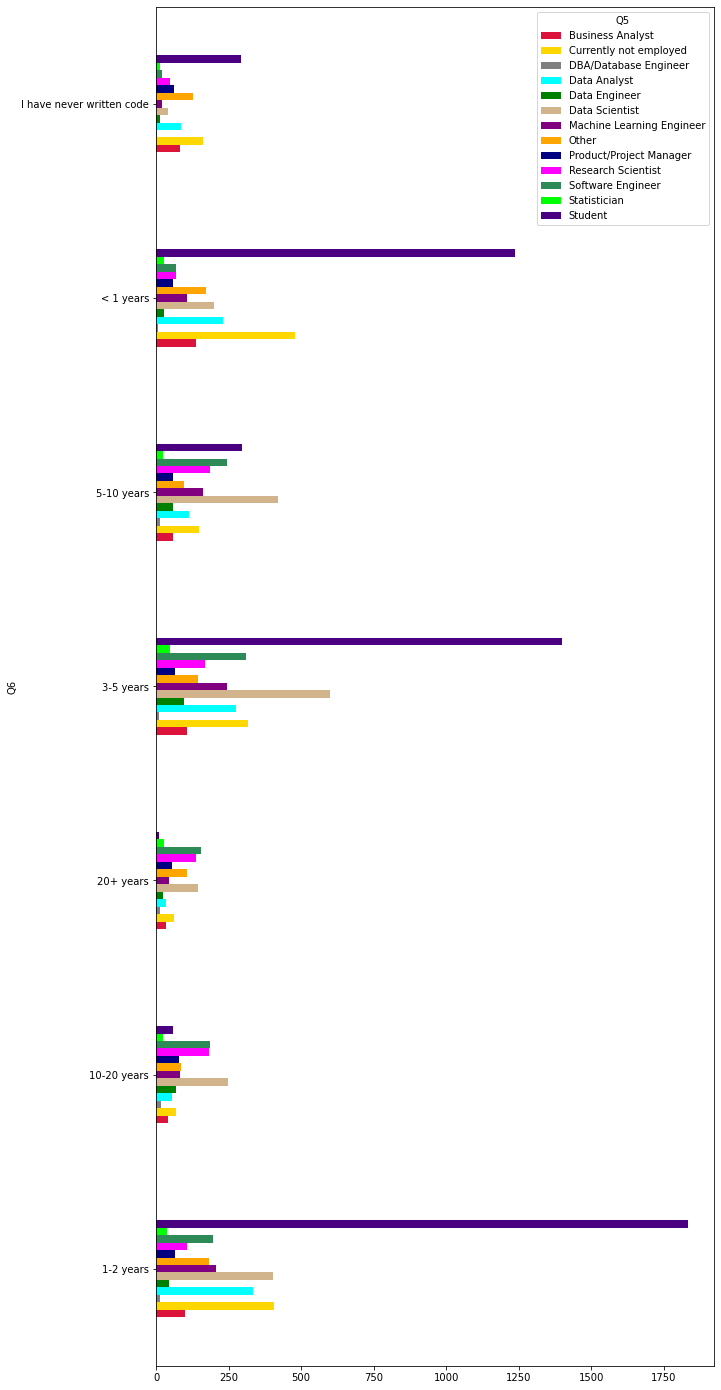

In [11]:
table=pd.crosstab(index=quality_DS['Q6'],columns=quality_DS['Q5'])
table.plot(kind='barh',figsize=(10,25),color=colour)
plt.show()

People with little experience of coding(<1,1-2 years) are mostly students. very few people amoung the respondents have never written a code. The role of data scientist requries more coding compared to similar roles such as data analyst,data engineer etc.

# Preferences

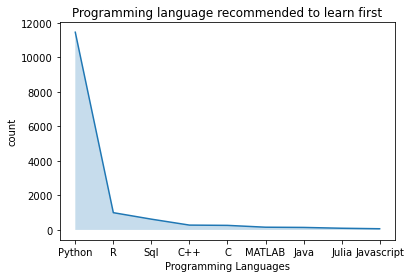

In [12]:
Frequency=quality_DS['Q8'].value_counts().drop(['Swift','Bash','None','Other'])
lang=['Python','R','Sql','C++','C','MATLAB','Java','Julia','Javascript']
plt.plot(lang,Frequency)
plt.xlabel('Programming Languages')
plt.ylabel('count')
plt.title('Programming language recommended to learn first')
plt.fill_between(lang,Frequency,alpha=0.25)
plt.show()

From the plot we can see that majority recommends learning Python first followed by R,SQL and C++

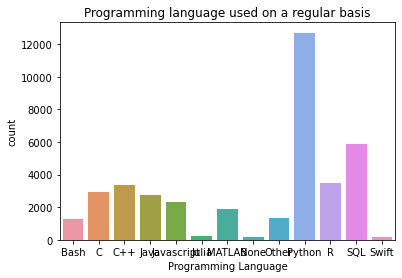

In [13]:
Q7_labels = []
Q7_count = []
for i in quality_DS.columns:
    if 'Q7' in i:
        Q7_labels.extend(quality_DS[i].value_counts().reset_index()['index'].tolist())
        Q7_count.extend(quality_DS[i].value_counts().reset_index()[i].tolist())
        Q7_labels, Q7_count = (list(t) for t in zip(*sorted(zip(Q7_labels, Q7_count))))
lang=sns.barplot(Q7_labels,Q7_count)
sns.set_style('white')
sns.set_context(font_scale=0.35)
lang.set(xlabel='Programming Language', ylabel='count')
plt.title('Programming language used on a regular basis')
plt.figure
plt.show()


The top programming languages used on regular basis are Python,SQL and R.

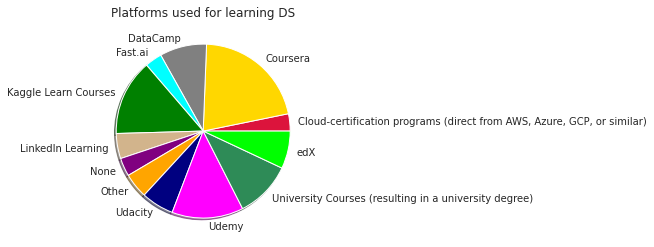

In [14]:
Q37_labels = []
Q37_count = []
for i in quality_DS.columns:
    if 'Q37' in i:
        Q37_labels.extend(quality_DS[i].value_counts().reset_index()['index'].tolist())
        Q37_count.extend(quality_DS[i].value_counts().reset_index()[i].tolist())
        Q37_labels, Q37_count = (list(t) for t in zip(*sorted(zip(Q37_labels, Q37_count))))
plt.pie(Q37_count,labels=Q37_labels,colors=colour,shadow=True)

plt.title('Platforms used for learning DS')
plt.show()

The favourite sources of learning Data Science includes Coursera,Kaggle learn and Udemy. very few people opt for cloud certification programs from AWS, Azure etc.

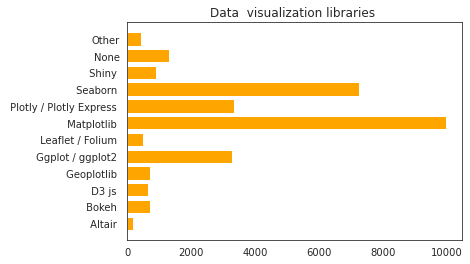

In [15]:
Q14_labels = []
Q14_count = []
for i in quality_DS.columns:
    if 'Q14' in i:
        Q14_labels.extend(quality_DS[i].value_counts().reset_index()['index'].tolist())
        Q14_count.extend(quality_DS[i].value_counts().reset_index()[i].tolist())
        Q14_labels, Q14_count = (list(t) for t in zip(*sorted(zip(Q14_labels, Q14_count))))
plt.barh(Q14_labels,Q14_count,color='orange')
plt.title("Data  visualization libraries ")
plt.show()

The most popular library for data visualization is Matplotlib,Seaborn and Plotly. Almost all the people in our study strongly believe in data visualization.

# Machine Learning & Computer Vision

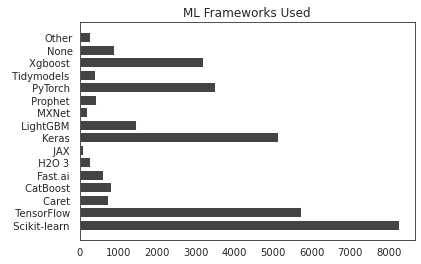

In [16]:
Q16_labels = []
Q16_count = []
for i in quality_DS.columns:
    if 'Q16' in i:
        Q16_labels.extend(quality_DS[i].value_counts().reset_index()['index'].tolist())
        Q16_count.extend(quality_DS[i].value_counts().reset_index()[i].tolist())
        Q16_labels, Q16_count = (list(t) for t in zip(*sorted(zip(Q16_labels, Q16_count))))
plt.barh(Q16_labels,Q16_count,color="#444444")
plt.title("ML Frameworks Used")
plt.show()

The frequently used ML frameworks include Scikit-learn,TensorFlow,keras and Pytorch.

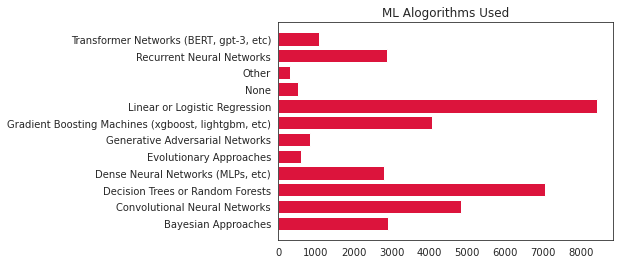

In [17]:
Q17_labels = []
Q17_count = []
for i in quality_DS.columns:
    if 'Q17' in i:
        Q17_labels.extend(quality_DS[i].value_counts().reset_index()['index'].tolist())
        Q17_count.extend(quality_DS[i].value_counts().reset_index()[i].tolist())
        Q17_labels, Q17_count = (list(t) for t in zip(*sorted(zip(Q17_labels, Q17_count))))
plt.barh(Q17_labels,Q17_count,color='crimson')
plt.title("ML Alogorithms Used")
plt.show()

The most popular algorithm is linear and Logistic Regression. Decision Trees,Random Forests,CNN,Gradient boosting machines and Bayesian approaches are some of the important alogrithms. In our set of quality Data Scientists very few people are unfamiliar with Machine learning algorithms.

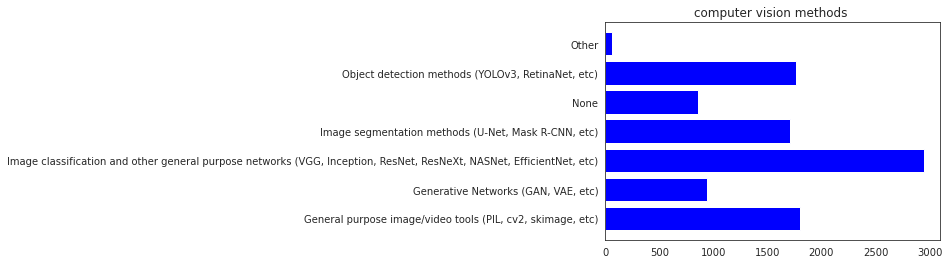

In [18]:
Q18_labels = []
Q18_count = []
for i in quality_DS.columns:
    if 'Q18' in i:
        Q18_labels.extend(quality_DS[i].value_counts().reset_index()['index'].tolist())
        Q18_count.extend(quality_DS[i].value_counts().reset_index()[i].tolist())
        Q18_labels, Q18_count = (list(t) for t in zip(*sorted(zip(Q18_labels, Q18_count))))
plt.barh(Q18_labels,Q18_count,color='blue')
plt.title("computer vision methods ")
plt.show()


The number of respondents in all the categories are pretty good .so ,it is purely upto the person what he /she likes more. Also,a fair share of people do not use any computer vision method

If this helped you in making choices feel free to upvote!